In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn.neighbors import NearestNeighbors

import librosa
import librosa.display

from utils import *

# Load Data

In [2]:
fma_small_path = 'fma_data/fma_small/'
fma_meta_path = 'fma_data/fma_metadata/'

In [3]:
audio_paths = get_all_audio_paths(fma_small_path)

features = fma_load(f'{fma_meta_path}features.csv')
tracks = fma_load(f'{fma_meta_path}tracks.csv')
genres = fma_load(f'{fma_meta_path}genres.csv')
echonest = fma_load(f'{fma_meta_path}echonest.csv')

# Train KNN Model

In [4]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print(f'{y_train.size} training examples, {y_test.size} testing examples')
print(f'{X_train.shape[1]} features, {np.unique(y_train).size} classes')

6400 training examples, 800 testing examples
140 features, 8 classes


In [5]:
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 46.38%


In [6]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(X_train)

# Query

Text(0, 0.5, 'distance')

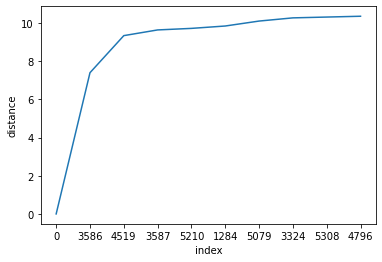

In [7]:
# Query one song
distances, indices = nbrs.kneighbors(X_train.head(1))
sns.lineplot(x=[str(e) for e in indices[0]], y=distances[0])
plt.xlabel('index')
plt.ylabel('distance')